## <center>Exploring Support Vector Machines - Classification</center>


[Link to a great Paper on SVM](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)
* A tutorial on support vector regression by ALEX J. SMOLA and BERNHARD SCHOLKOPF



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/SVM/Data Sets/mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

### Classes

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

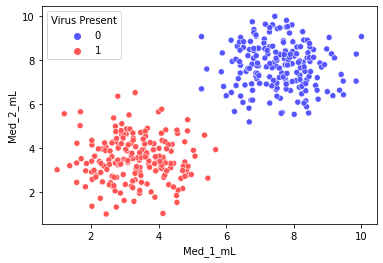

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

### Separating Hyperplane

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

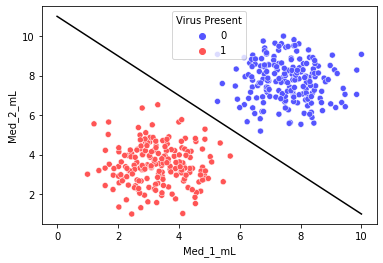

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane (a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

### SVM - Support Vector Machine

Kernelized support vector machines are powerful models and perform well on a variety of datasets. SVMs allow for complex decision boundaries, even if the data has only a few features. They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.

The important parameters in kernel SVMs are the regularization parameter C, the choice of the kernel, and the kernel-specific parameters. Although we primarily focused on the RBF kernel, other choices are available in scikit-learn. The RBF kernel has only one parameter, gamma, which is the inverse of the width of the Gaussian kernel. gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [6]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [7]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [8]:
X = df.drop(columns='Virus Present') 
y = df['Virus Present']

In [9]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [10]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

from svm_margin_plot import plot_svm_boundary

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


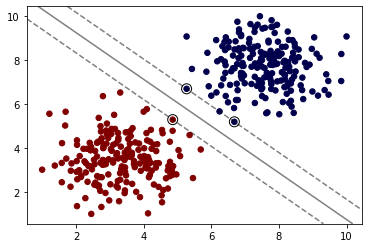

In [11]:
plot_svm_boundary(model,X,y)

### Hyper Parameters

#### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [12]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


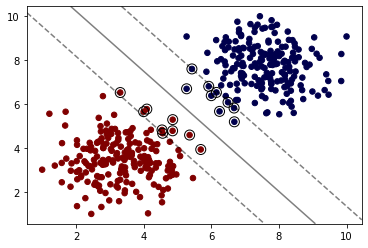

In [13]:
plot_svm_boundary(model,X,y)

In this case, the higher the value, the closer the model performs as a maximum margin classifier. On the other hand, the lower the value, more points are allowed in the margins --> SVM classifier

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


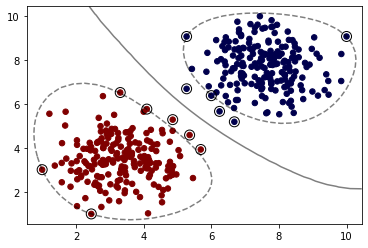

In [14]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

##### gamma

The gamma parameters determines the effect influence a single support point has.

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


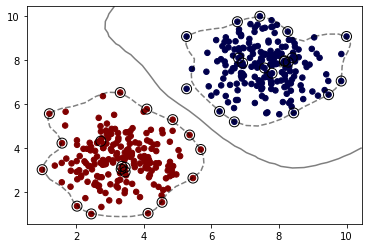

In [15]:
model = SVC(kernel='rbf', C=1, gamma="auto") # Auto has a value of 0.5, only 2 features
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


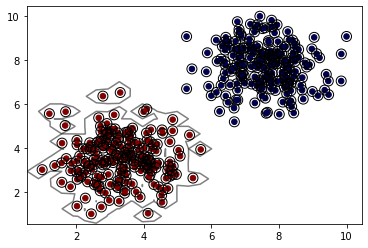

In [16]:
model = SVC(kernel='rbf', C=1, gamma=100) # If value of gamma is increased, more influence --> overfit
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


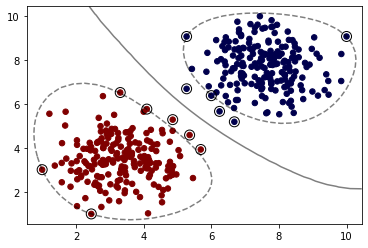

In [17]:
model = SVC(kernel='rbf', C=1, gamma="scale") # Best choice is scale
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### Other Kernels

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


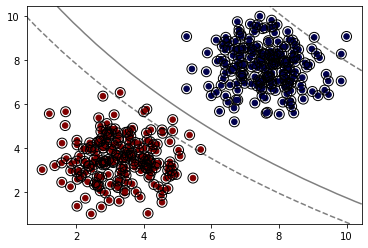

In [18]:
model = SVC(kernel='sigmoid') # Not very effective, takes many SV points
model.fit(X, y)
plot_svm_boundary(model,X,y)

##### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


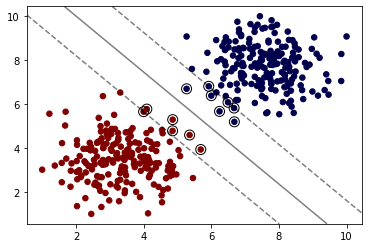

In [19]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


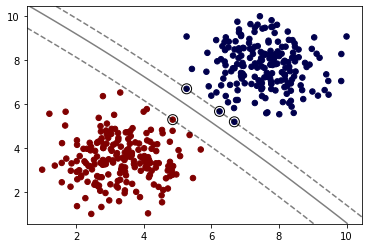

In [20]:
model = SVC(kernel='poly', C=1, degree=6) # Curves the lines, not very clear due to the fact that straight line performs good
model.fit(X, y)
plot_svm_boundary(model,X,y)

### Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [23]:
# 100% accuracy (as expected)
grid.best_score_

1.0

In [24]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

This is more to review the grid search process, recall in a real situation such as your exercise, you will perform a train|test split and get final evaluation metrics.

----

### Example

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
cancer = load_breast_cancer()

In [27]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["Target"] = cancer.target

In [28]:
X = df.drop(columns="Target")
y = df["Target"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [32]:
grid.best_score_

0.9788508891928865

In [33]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}